**<h2>Experiment 1</h2>**

**PROBLEM STATEMENT - This data is about the amount spent on advertising through different channels like TV, radio, newspaper. the goal is to predict how the expense spent on each channel affects the sale and is there a way to optimize that sale**

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
data = pd.read_csv('Advertising.csv')
data

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [13]:
data.head() # first 5 rows

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [14]:
data.shape # number of rows and columns

(200, 5)

In [15]:
data.info() # data types of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [16]:
data.describe() # summary statistics

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [17]:
data.isna().sum() # number of missing values in each column

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [18]:
data.boxplot()

<AxesSubplot: >

**Identifying Outliers**

In [19]:
fig, axs = plt.subplots(3, figsize=(5, 5))
plt1 = sns.boxplot(data['TV'], ax=axs[0])
plt3 = sns.boxplot(data['newspaper'], ax=axs[1])
plt2 = sns.boxplot(data['radio'], ax=axs[2])
plt.tight_layout()
fig.savefig('advertising_outlier.png')


**Scatter Plot**

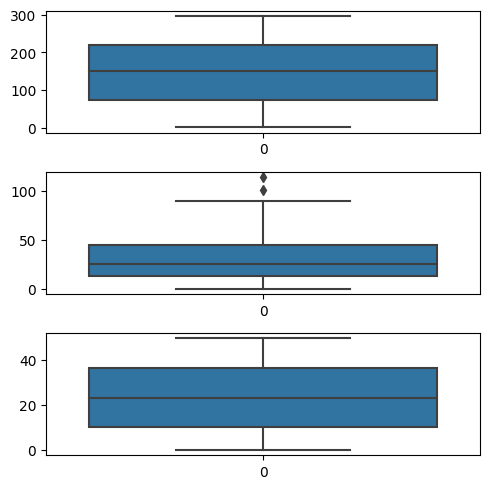

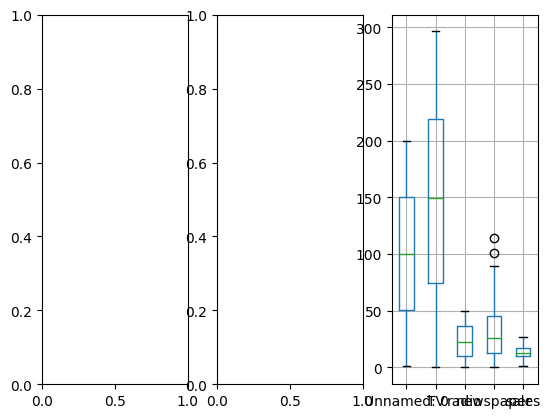

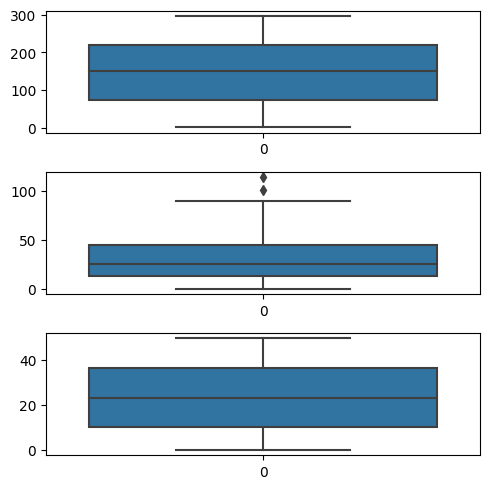

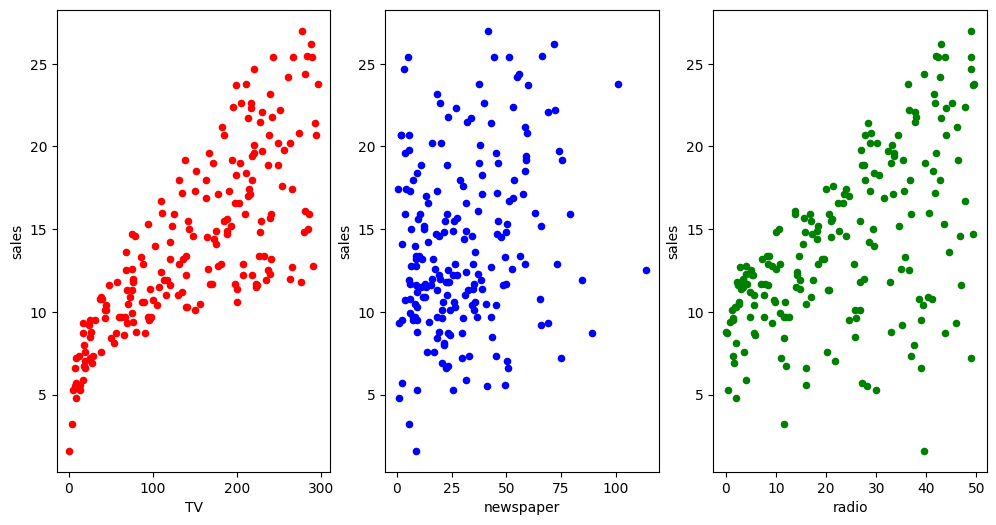

In [20]:
fig, axs = plt.subplots(1, 3)
data.plot(kind='scatter', x='TV', y='sales', color='red', ax=axs[0], figsize=(12, 6))
data.plot(kind='scatter', x='newspaper', y='sales', color='blue', ax=axs[1], figsize=(12, 6))
data.plot(kind='scatter', x='radio', y='sales', color='green', ax=axs[2], figsize=(12, 6))
plt.show()

**LINEAR REGRESSION MODEL**

In [21]:
X = data[['TV']]
y = data.sales

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

LinearRegression()

**Finding intercept and coefficent**

In [22]:
print(lm.intercept_)
print(lm.coef_)

7.032593549127695
[0.04753664]


**Sales = 0.047X + 7.03**

In [23]:
%%capture --no-display
lm.predict([[50]])


array([9.40942557])

**R2 Score**

In [24]:
from sklearn.metrics import r2_score
z = lm.predict(X)
r2_score(y_true=y, y_pred=z)

0.611875050850071

**Mean Absolute Error**

In [25]:
from sklearn.metrics import mean_absolute_error

m = lm.predict(X)
mean_absolute_error(y_true=y, y_pred=m)

2.549806038927486

**Mean Square Absolute Error**

In [26]:
from sklearn.metrics import mean_squared_error

ms = lm.predict(X)
mean_squared_error(y_true=y, y_pred=ms)

10.512652915656757

**Root Mean Square**

In [27]:
import math
from sklearn.metrics import mean_squared_error

ms = lm.predict(X)
mse = mean_squared_error(y_true=y, y_pred=ms)
rmse = math.sqrt(mse)
rmse

3.2423221486546887